In [5]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import islice
from collections import defaultdict
from DataPreparation import *

img_dir = 'Datasets/Chestxray/images'

## Skip-connections

100%|██████████| 50/50 [00:15<00:00,  3.33it/s]


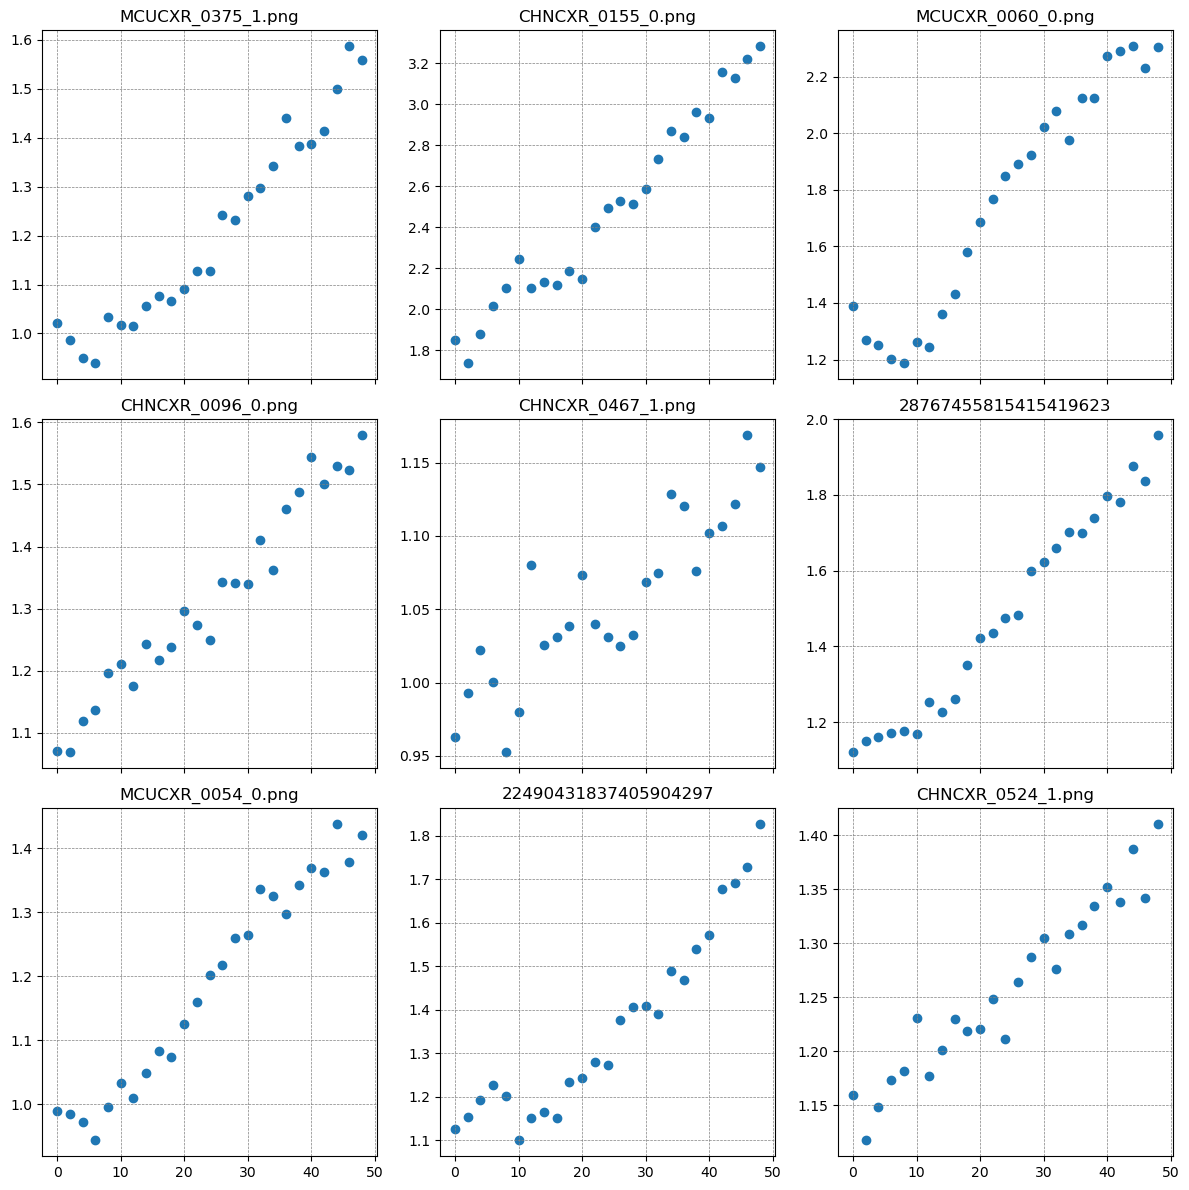

In [6]:
output_dir = 'Datasets/Chestxray/Output_Skip'

noise_skip = process_and_store_sigma('noise', img_dir, output_dir)
gblur_skip = process_and_store_sigma('blurring/gaussian', img_dir, output_dir)
mblur_skip = process_and_store_sigma('blurring/median', img_dir, output_dir)
morphing_skip = process_and_store_sigma('morphing', img_dir, output_dir)

# Plot results
gblur_skip_subset = dict(islice(gblur_skip.items(), 9))
fig, ax = plot_sigmas_mean(gblur_skip_subset)

### Gaussian noise

Incerteza global (posterior) promediada para cada imagen

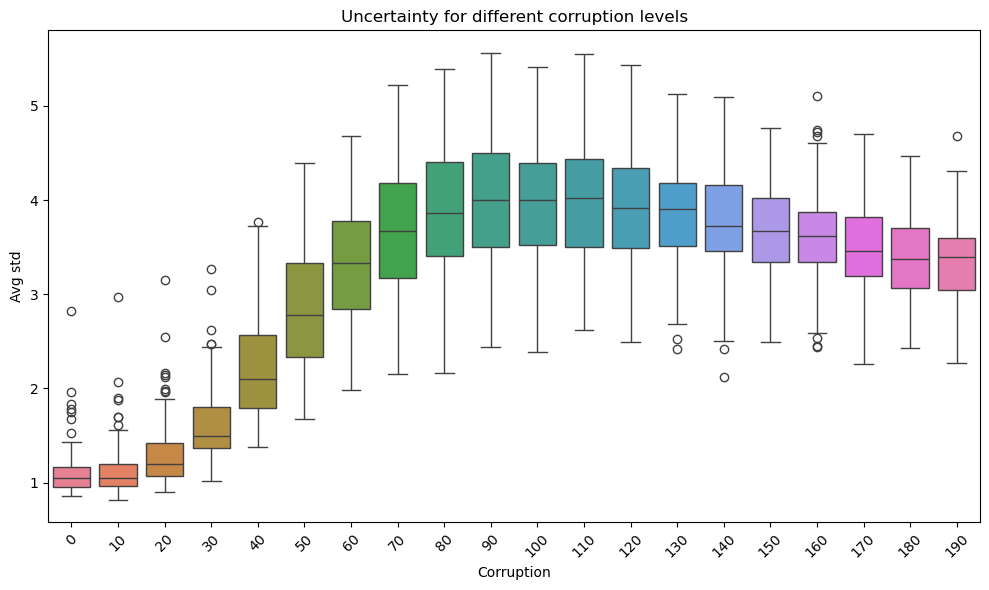

In [7]:
sigmas_global = defaultdict(list)

for val in noise_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

plot_global_uncertainty(sigmas_global, title='Uncertainty for different corruption levels')
plt.show()

Incerteza a nivel nodo para cada imagen

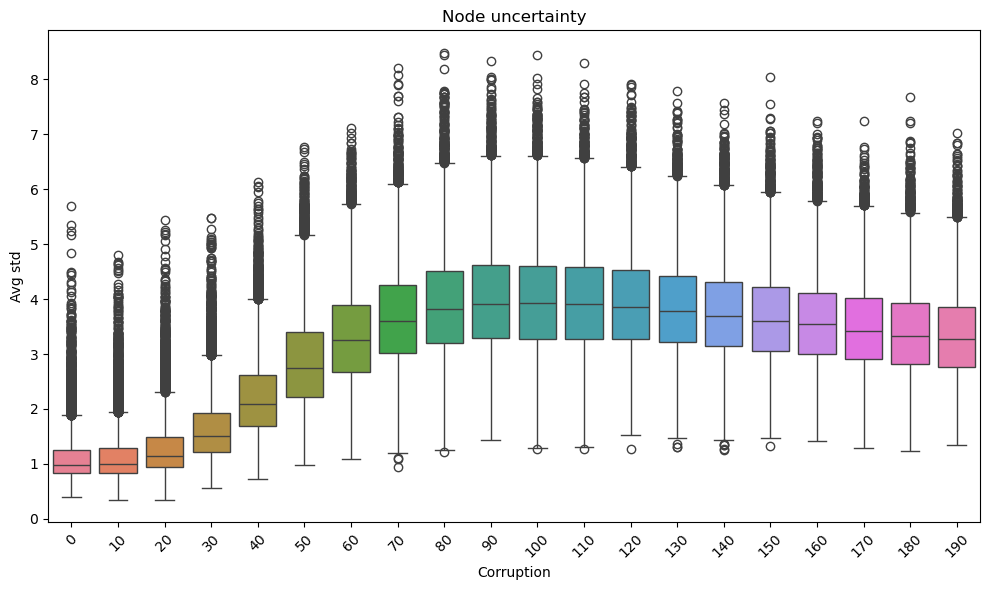

In [8]:
sigmas_global = defaultdict(list)

for val in noise_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma)

fig, ax = plot_global_uncertainty(sigmas_global, title='Node uncertainty')

Incerteza promedio en espacio latente para distintas imagenes y niveles de corrupcion

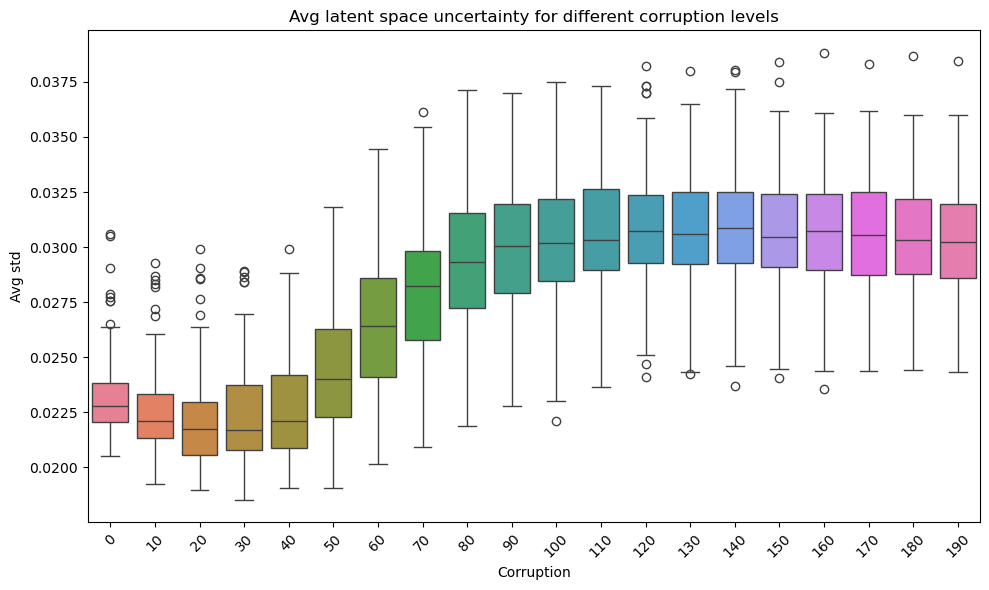

In [9]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_noise_skip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

plot_global_uncertainty(sigmas_global, title='Avg latent space uncertainty for different corruption levels')
plt.show()

Incerteza en espacio latente (sin promediar) para distintas imagenes y niveles de corrupcion

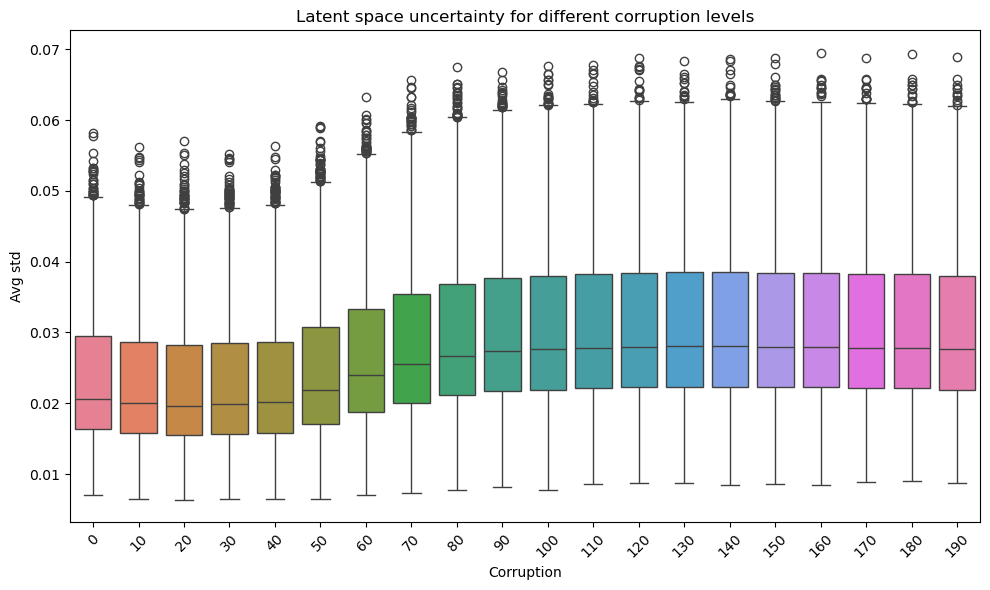

In [10]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_noise_skip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma)

plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different corruption levels')
plt.show()

### Gaussian blur

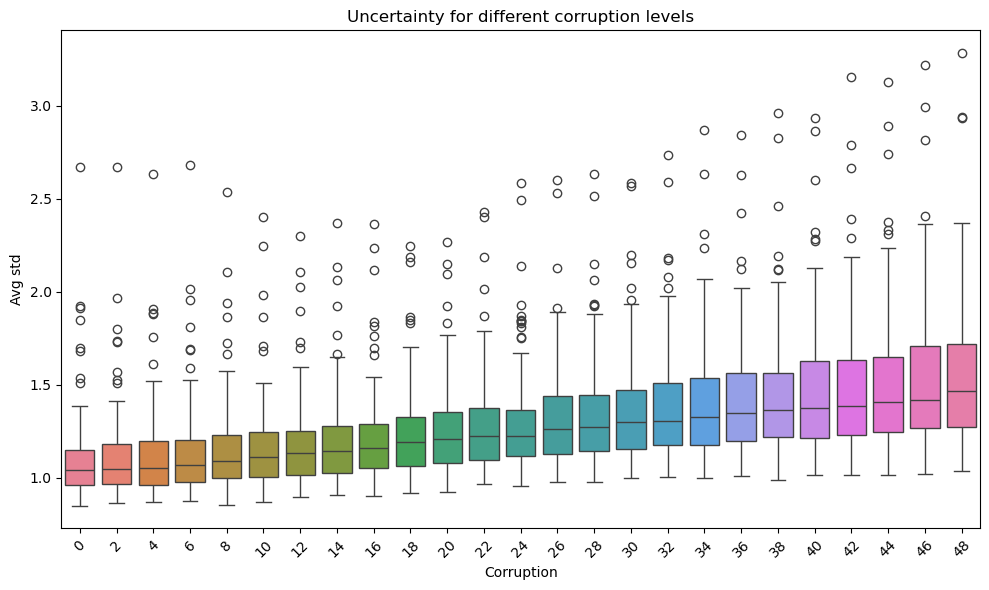

In [11]:
sigmas_global = defaultdict(list)

for val in gblur_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

plot_global_uncertainty(sigmas_global, title='Uncertainty for different corruption levels')
plt.show()

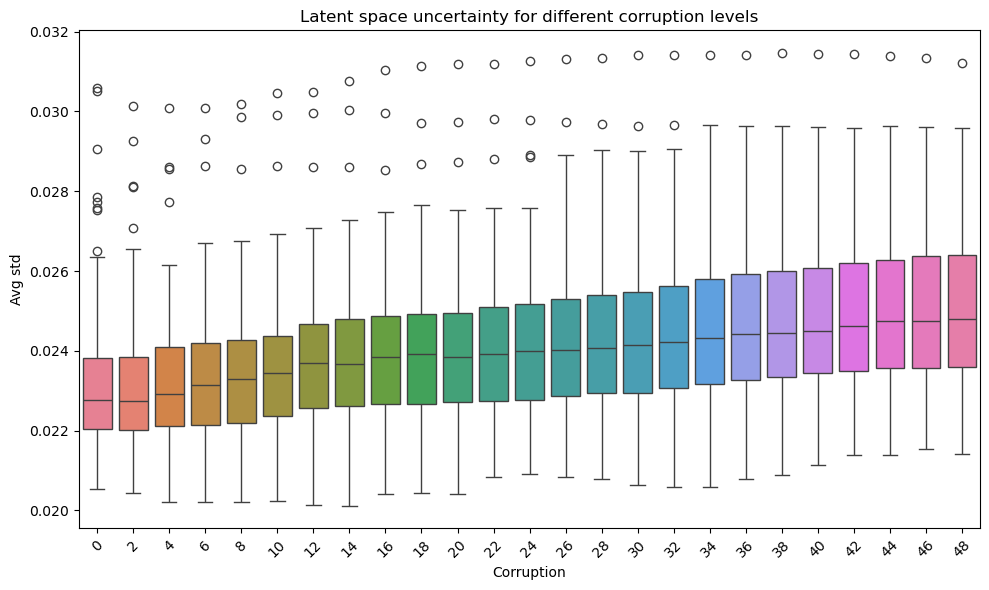

In [12]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_gaussianblur_skip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different corruption levels')
plt.show()

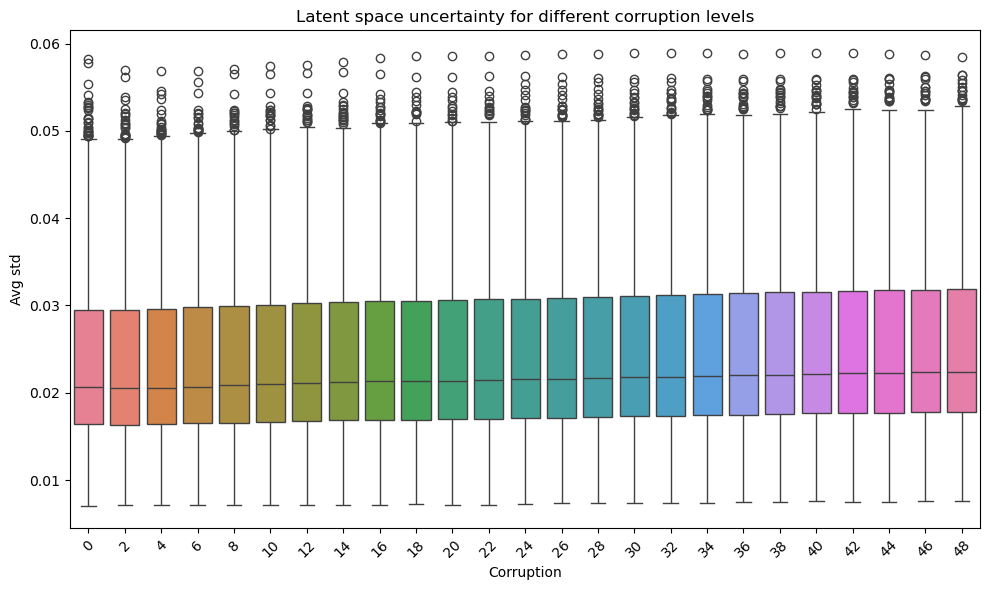

In [13]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_gaussianblur_skip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma)

plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different corruption levels')
plt.show()

### Median blur

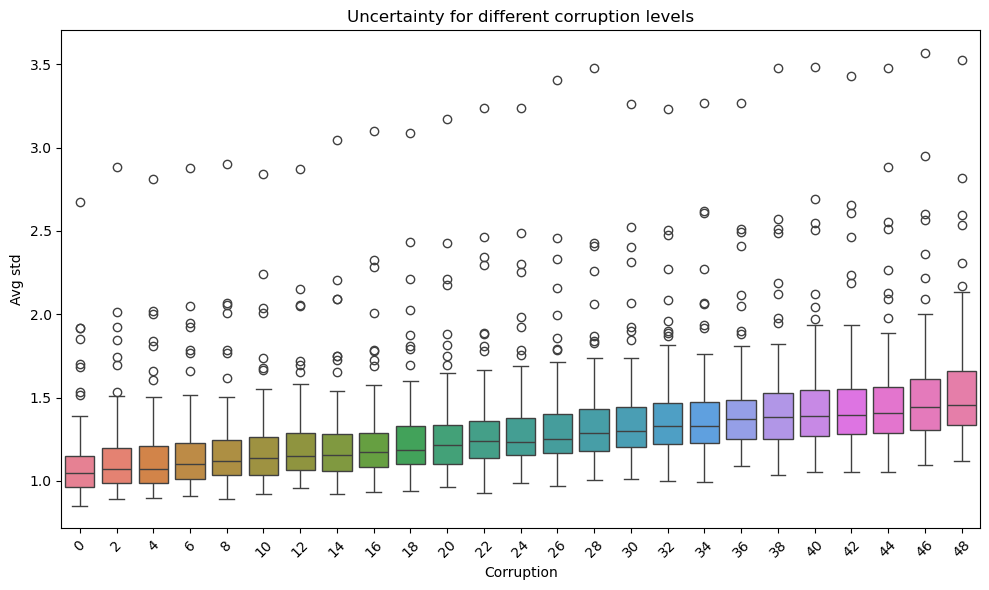

In [14]:
sigmas_global = defaultdict(list)

for val in mblur_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

plot_global_uncertainty(sigmas_global, title='Uncertainty for different corruption levels')
plt.show()

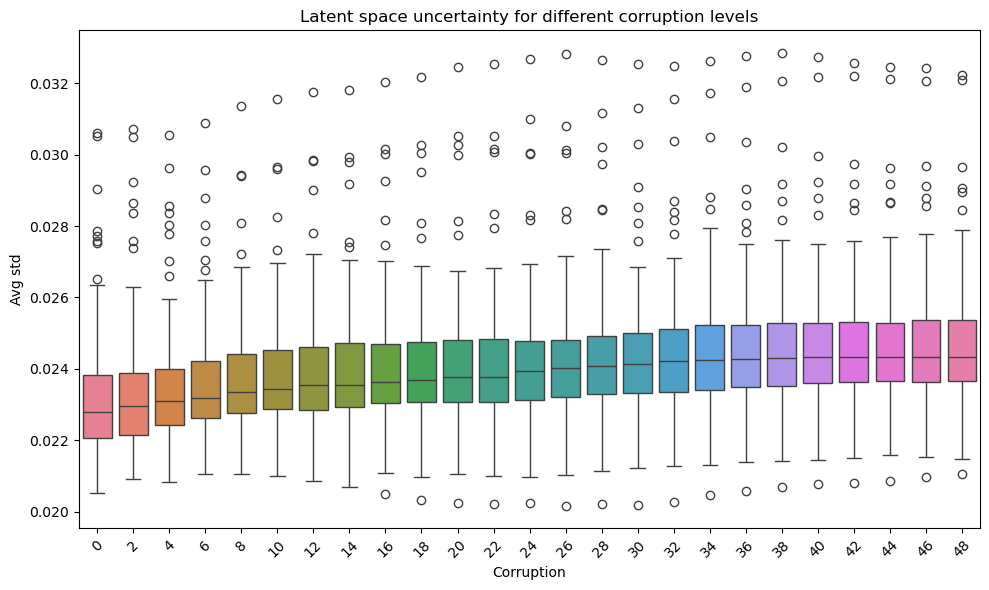

In [15]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_medianblur_skip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different corruption levels')
plt.show()

### Image morphing

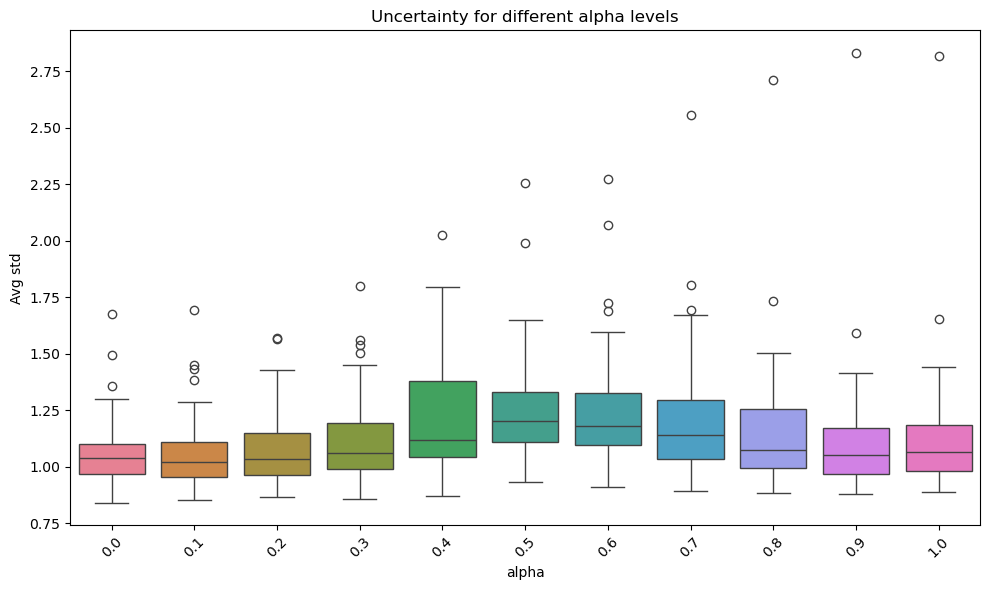

In [16]:
sigmas_global = defaultdict(list)

for val in morphing_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

keys = np.round(np.arange(0, 1.1, 0.1), 2)
sigmas_global = dict(zip(keys, sigmas_global.values()))
fig, ax = plot_global_uncertainty(sigmas_global, title='Uncertainty for different alpha levels')
ax.set_xlabel('alpha')
plt.show()

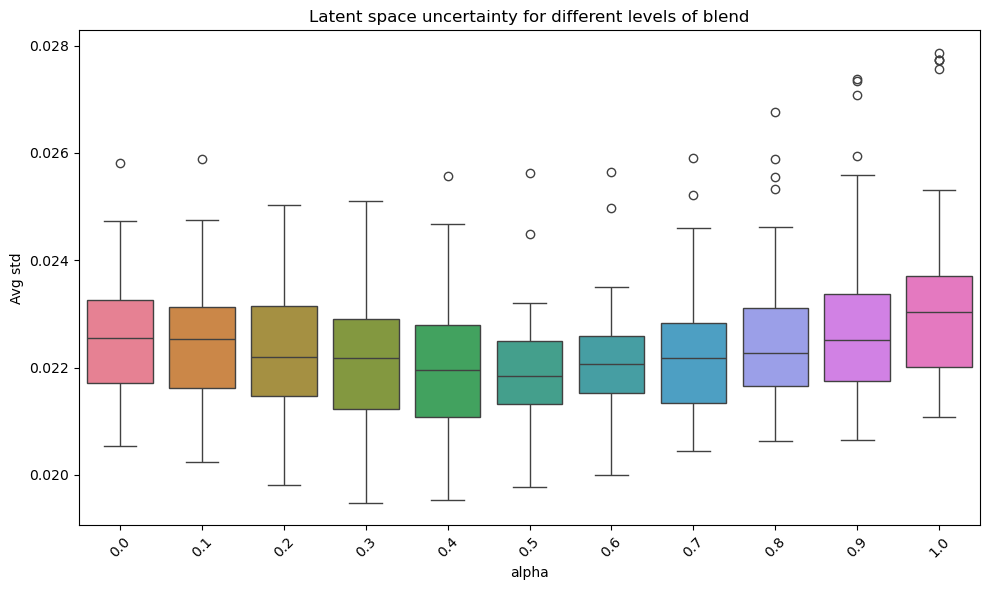

In [17]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_blend_skip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

keys = np.round(np.arange(0, 1.1, 0.1), 2)
sigmas_global = dict(zip(keys, sigmas_global.values()))
fig, ax = plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different levels of blend')
ax.set_xlabel('alpha')
plt.show()

### Error

Text(0.9789304634814607, 61.58924098053114, 'Corr: 0.55')

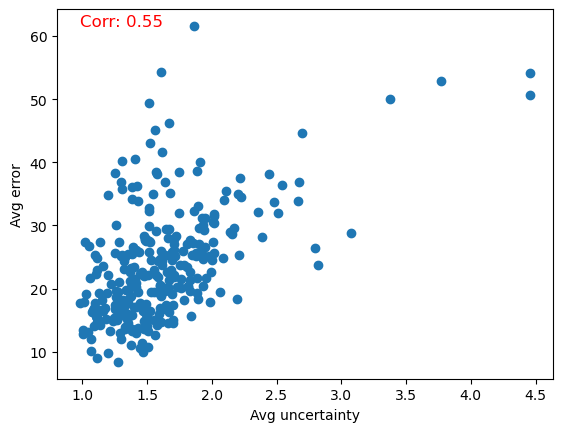

In [18]:
img_dir_OCC = os.path.join(img_dir, 'Corrupted', 'occlusion')
output_dir_OCC = os.path.join(output_dir, 'Corrupted', 'occlusion')
files = os.listdir(img_dir_OCC)

mean_errors, mean_sigmas  = [], []        
node_err, node_sigmas = [], []

# Single loop over files
for file in files:
    error, sigma = get_error(img_dir_OCC, output_dir_OCC, file)
    
    # Store means 
    mean_errors.append(error.mean())
    mean_sigmas.append(sigma.mean())
    
    # Store errors per node
    node_err.extend(error)
    node_sigmas.extend(sigma)

correlation = np.corrcoef(mean_sigmas, mean_errors)[0, 1]

plt.scatter(mean_sigmas, mean_errors)
plt.xlabel('Avg uncertainty')
plt.ylabel('Avg error')
plt.text(min(mean_sigmas), max(mean_errors), f'Corr: {correlation:.2f}', fontsize=12, color='red')

## No skip-connections

In [19]:
output_dir = 'Datasets/Chestxray/Output_NoSkip'

noise_noskip = process_and_store_sigma('noise', img_dir, output_dir)
gblur_noskip = process_and_store_sigma('blurring/gaussian', img_dir, output_dir)
mblur_noskip = process_and_store_sigma('blurring/median', img_dir, output_dir)
morphing_noskip = process_and_store_sigma('morphing', img_dir, output_dir)

# Plot results
gblur_noskip_subset = dict(islice(gblur_noskip.items(), 9))

100%|██████████| 50/50 [00:15<00:00,  3.29it/s]


### Gaussian noise

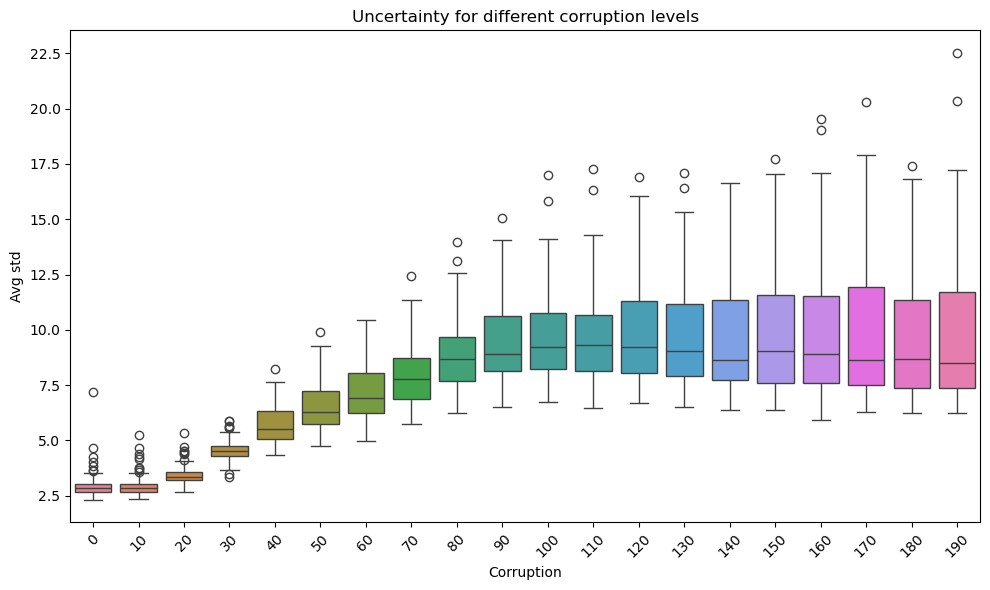

In [20]:
sigmas_global = defaultdict(list)

for val in noise_noskip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

fig, ax = plot_global_uncertainty(sigmas_global, title='Uncertainty for different corruption levels')

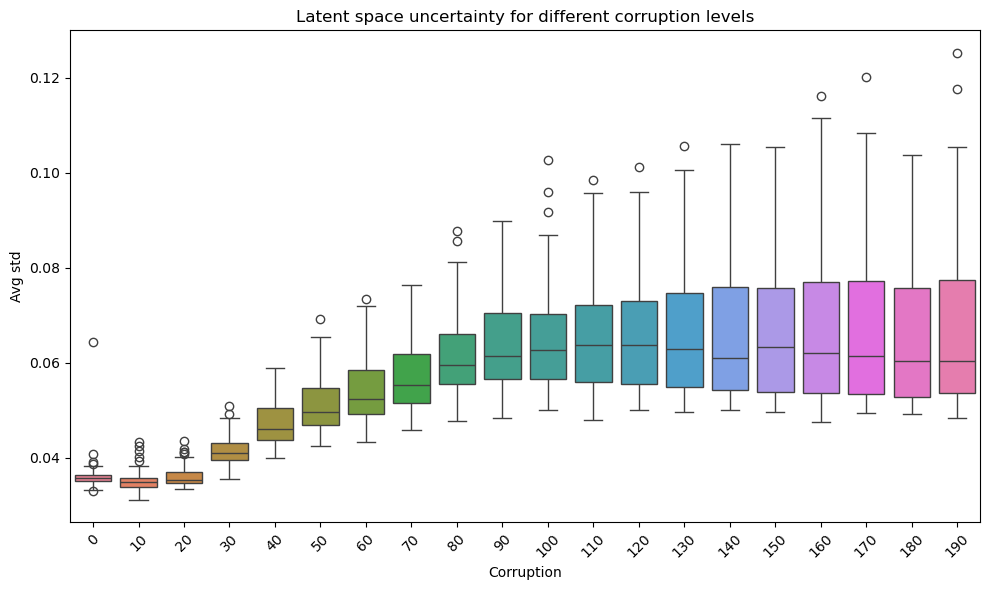

In [21]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_noise_noskip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

fig, ax = plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different corruption levels')

### Gaussian blur

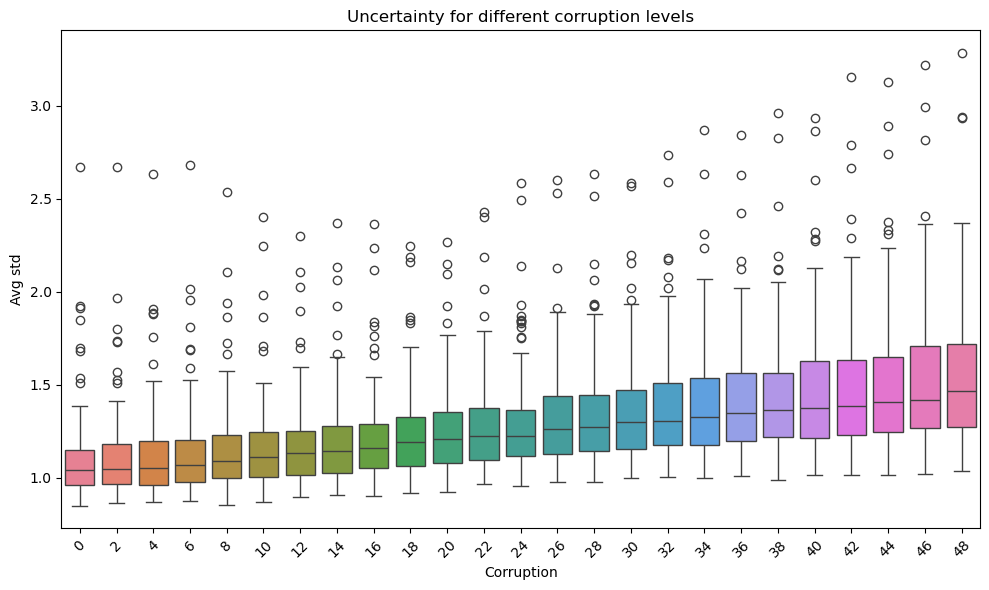

In [22]:
sigmas_global = defaultdict(list)

for val in gblur_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

fig, ax = plot_global_uncertainty(sigmas_global, title='Uncertainty for different corruption levels')

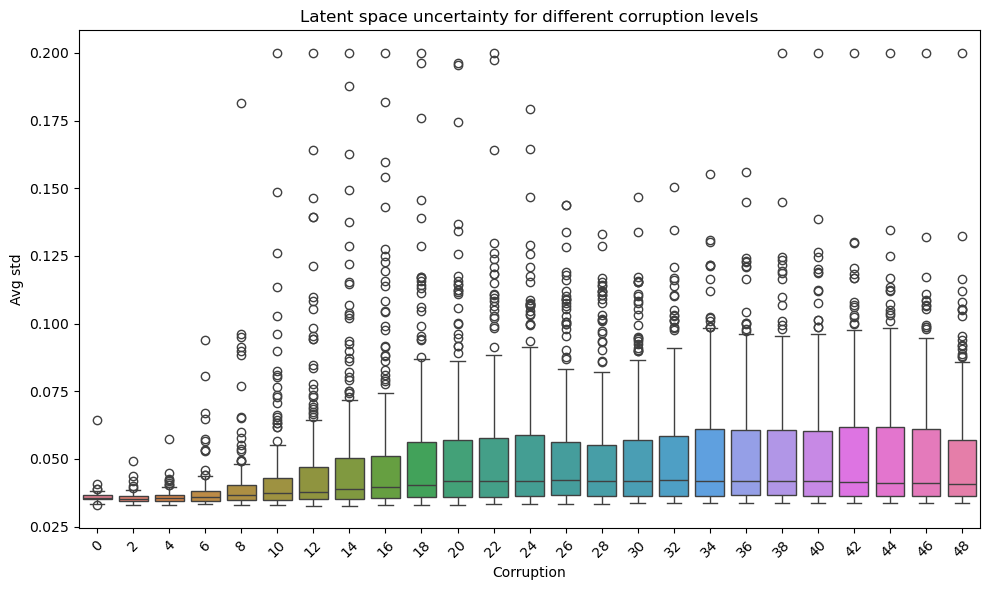

In [31]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_gaussianblur_noskip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(np.clip(sigma.mean(), a_min=None, a_max=0.2))

fig, ax = plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different corruption levels')

### Median blur

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Uncertainty for different corruption levels'}, xlabel='Corruption', ylabel='Avg std'>)

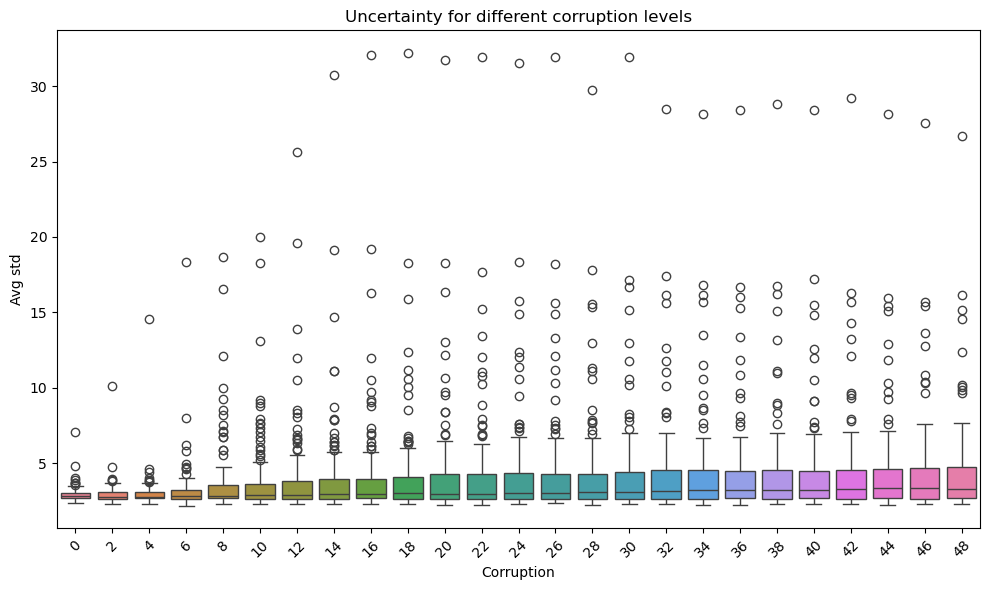

In [24]:
sigmas_global = defaultdict(list)

for val in mblur_noskip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

plot_global_uncertainty(sigmas_global, title='Uncertainty for different corruption levels')

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Latent space uncertainty for different corruption levels'}, xlabel='Corruption', ylabel='Avg std'>)

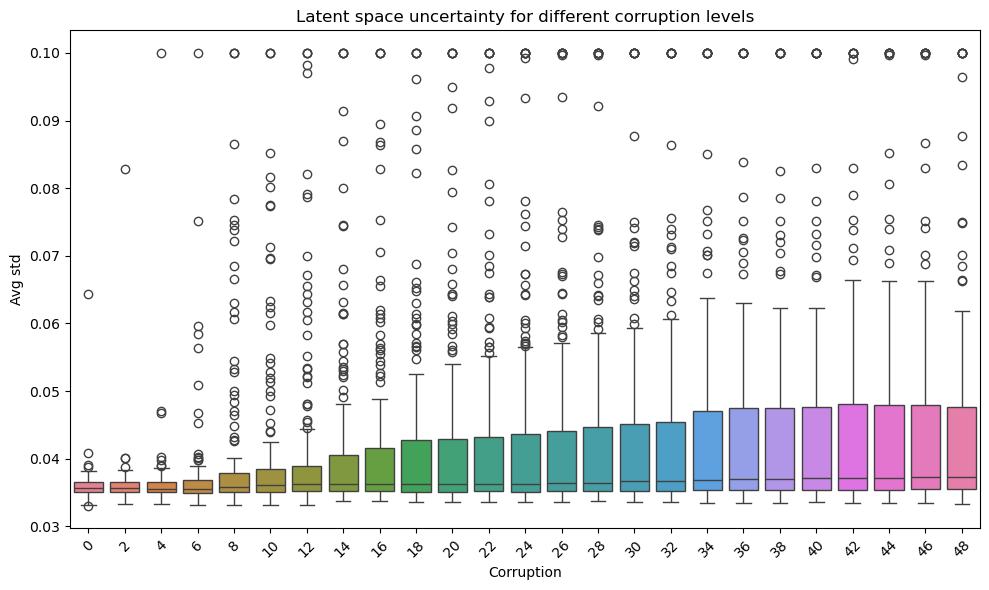

In [34]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_medianblur_noskip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(np.clip(sigma.mean(), a_min=None, a_max=0.1))

plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different corruption levels')

### Image morphing

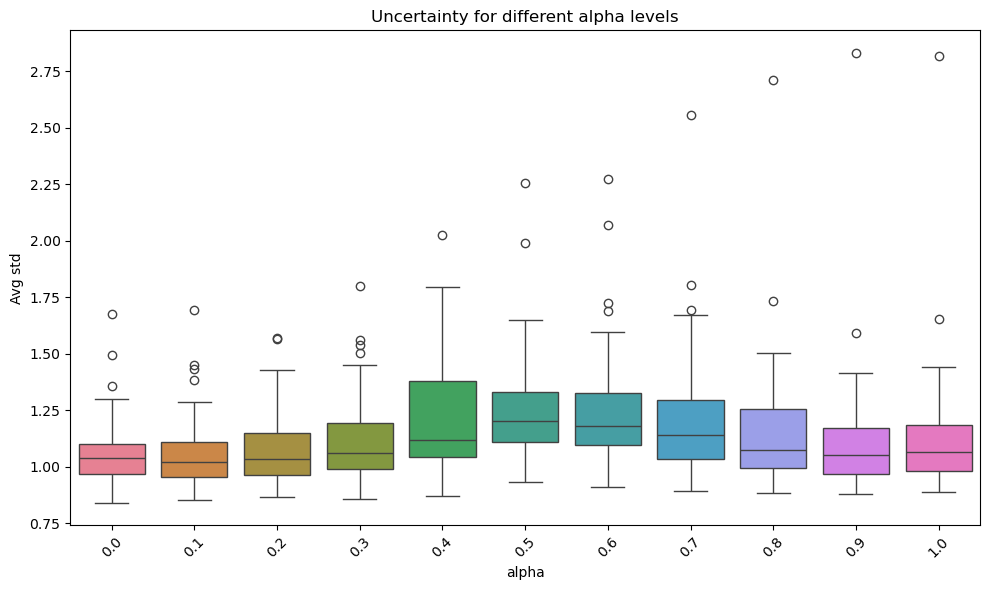

In [26]:
sigmas_global = defaultdict(list)

for val in morphing_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

keys = np.round(np.arange(0, 1.1, 0.1), 2)
sigmas_global = dict(zip(keys, sigmas_global.values()))
fig, ax = plot_global_uncertainty(sigmas_global, title='Uncertainty for different alpha levels')
ax.set_xlabel('alpha')
plt.show()

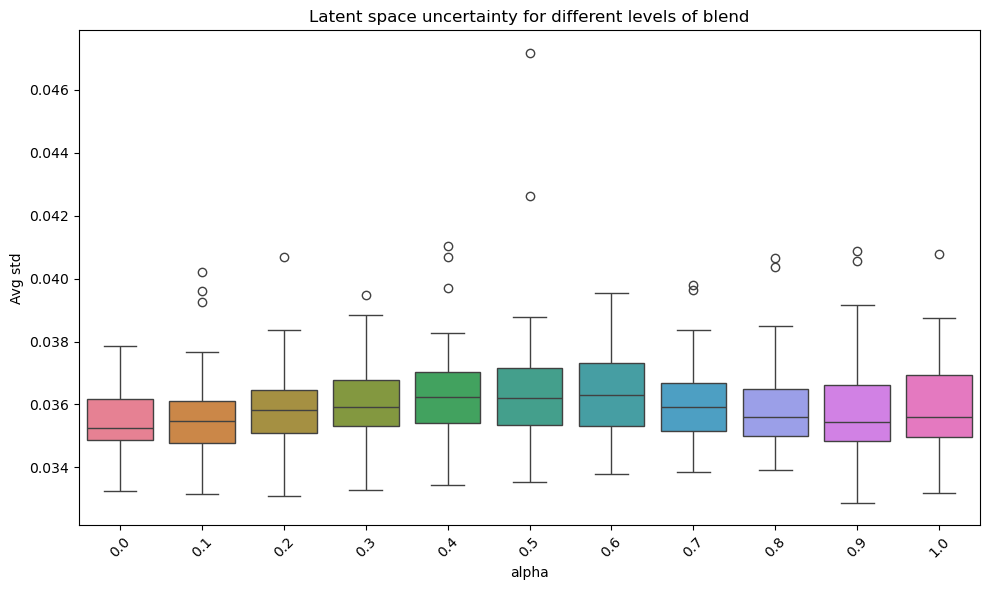

In [27]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_blend_noskip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

keys = np.round(np.arange(0, 1.1, 0.1), 2)
sigmas_global = dict(zip(keys, sigmas_global.values()))
fig, ax = plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different levels of blend')
ax.set_xlabel('alpha')
plt.show()

### Error

Text(2.4908572945601315, 135.14829582571016, 'Corr: 0.74')

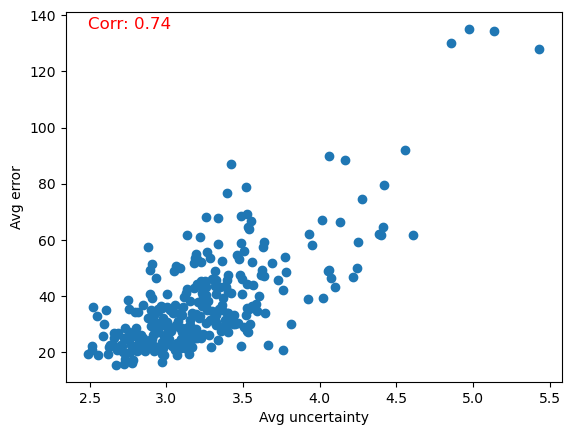

In [28]:
img_dir_OCC = os.path.join(img_dir, 'Corrupted', 'occlusion')
output_dir_OCC = os.path.join(output_dir, 'Corrupted', 'occlusion')
files = os.listdir(img_dir_OCC)

mean_errors, mean_sigmas  = [], []        
node_err, node_sigmas = [], []

# Single loop over files
for file in files:
    error, sigma = get_error(img_dir_OCC, output_dir_OCC, file)
    
    # Store means 
    mean_errors.append(error.mean())
    mean_sigmas.append(sigma.mean())
    
    # Store errors per node
    node_err.extend(error)
    node_sigmas.extend(sigma)

correlation = np.corrcoef(mean_sigmas, mean_errors)[0, 1]

plt.scatter(mean_sigmas, mean_errors)
plt.xlabel('Avg uncertainty')
plt.ylabel('Avg error')
plt.text(min(mean_sigmas), max(mean_errors), f'Corr: {correlation:.2f}', fontsize=12, color='red')